In [1]:
# Import the libraries require for data processing, Pyspark and Time Series ARIMA
import pandas as pd
import numpy as np
import datetime

# For Spark
from pyspark.sql import  SparkSession
from pyspark import SparkContext
from pyspark.sql.types import *
from pyspark import SQLContext
import matplotlib.pyplot as plt

from pyspark.sql.functions import col, countDistinct
from pyspark.sql.functions import isnan, when, count, col
from pyspark.sql.functions import year, month, dayofmonth

# For Beautiful Plotting
import matplotlib as plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
# Create Spark Context and SQL Context
sc = SparkContext()
sqlContext = SQLContext(sc)

In [3]:
# Read the transaction data from hdfs storage
sdfTransactions = sqlContext.read.csv("/gl-capstone-data/Team6-C-Sep/Data/transactions_store44.csv",header = True,inferSchema = True)

In [4]:
# Read the store details data from hadoop
sdfStores=sqlContext.read.csv("/gl-capstone-data/Team6-C-Sep/Data/stores.csv",header = True,inferSchema = True)

In [5]:
# Form the Sales data frame from transaction data and to EDA
pdfTransaction =pd.merge(sdfTransactions.toPandas(),sdfStores.toPandas(),how='left')
pdfTransaction.describe()

,store_nbr,transactions,cluster
count,1089.0,1089.000000,1089.0
mean,44.0,4325.125803,5.0
std,0.0,749.300106,0.0
min,44.0,2333.000000,5.0
25%,44.0,3797.000000,5.0
50%,44.0,4133.000000,5.0
75%,44.0,4787.000000,5.0
max,44.0,8359.000000,5.0


In [6]:
# Total records should match 
ts=pdfTransaction.loc[pdfTransaction['store_nbr']==44,['date','transactions']].set_index('date')
ts.count()
ts=ts.transactions.astype('float')

In [10]:
ts.head()

date
2013-01-02    4821.0
2013-01-03    3618.0
2013-01-04    4169.0
2013-01-05    4921.0
2013-01-06    4925.0
Name: transactions, dtype: float64

In [18]:
type(ts)

pandas.core.series.Series

In [21]:
y = ts.to_frame(name="transactions")

In [22]:
y.head(3)

,transactions
date,
2013-01-02,4821.0
2013-01-03,3618.0
2013-01-04,4169.0


In [7]:
import statsmodels.api as sm

/usr/local/anaconda/python2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [23]:
y = y['transactions'].resample('MS').mean()

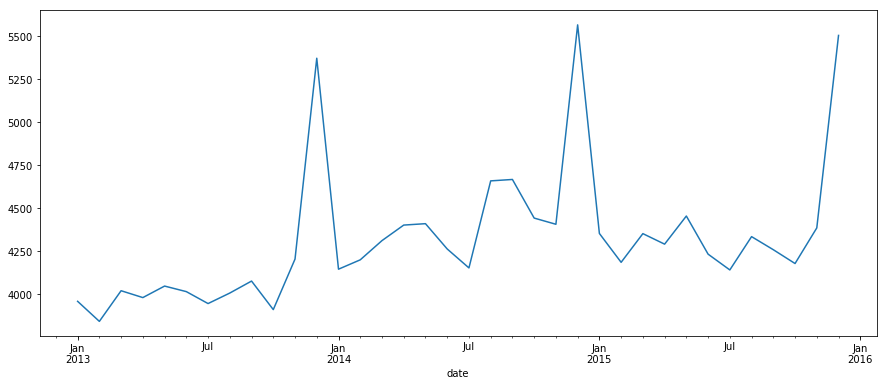

In [24]:
y.plot(figsize=(15, 6))

In [25]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')

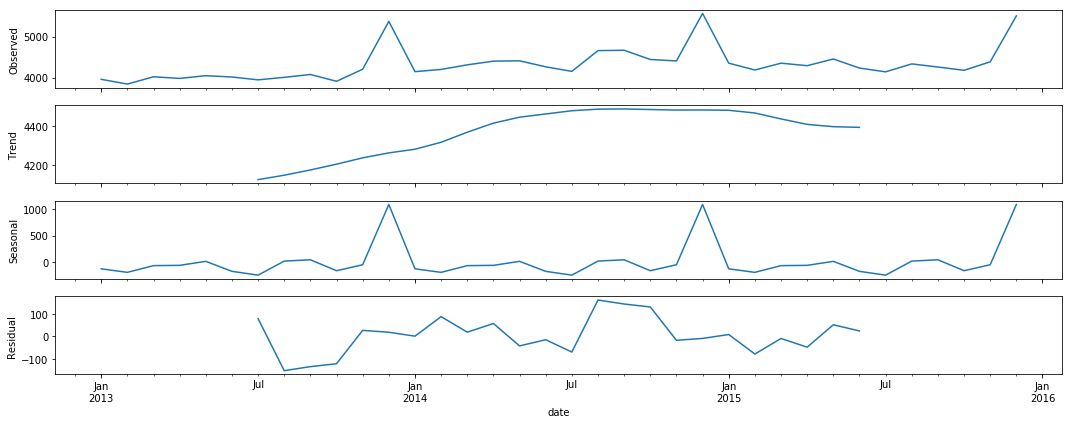

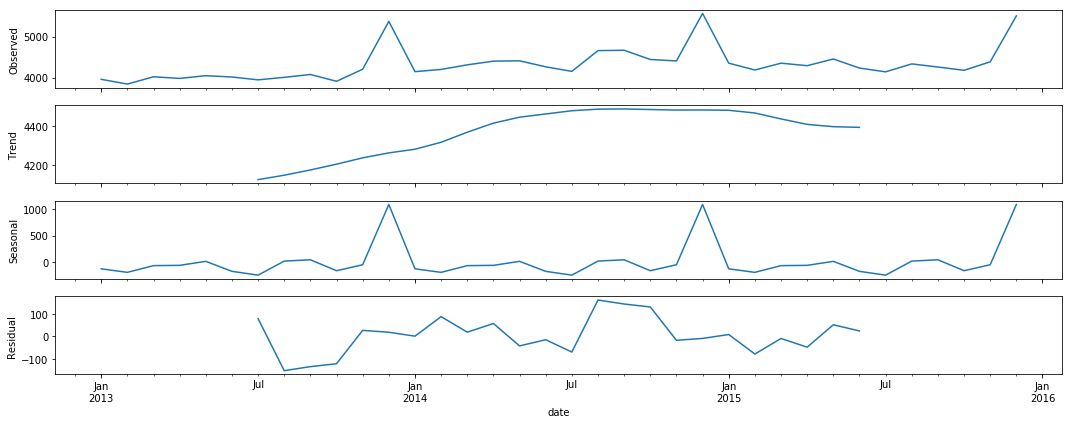

In [26]:
decomposition.plot()

In [38]:
y1 = ts.to_frame(name="transactions")

In [39]:
y1 = y1['2013-01-01':'2013-03-01']

In [40]:
y1.head()

,transactions
date,
2013-01-02,4821.0
2013-01-03,3618.0
2013-01-04,4169.0
2013-01-05,4921.0
2013-01-06,4925.0


In [41]:
decomposition = sm.tsa.seasonal_decompose(y1, model='additive')

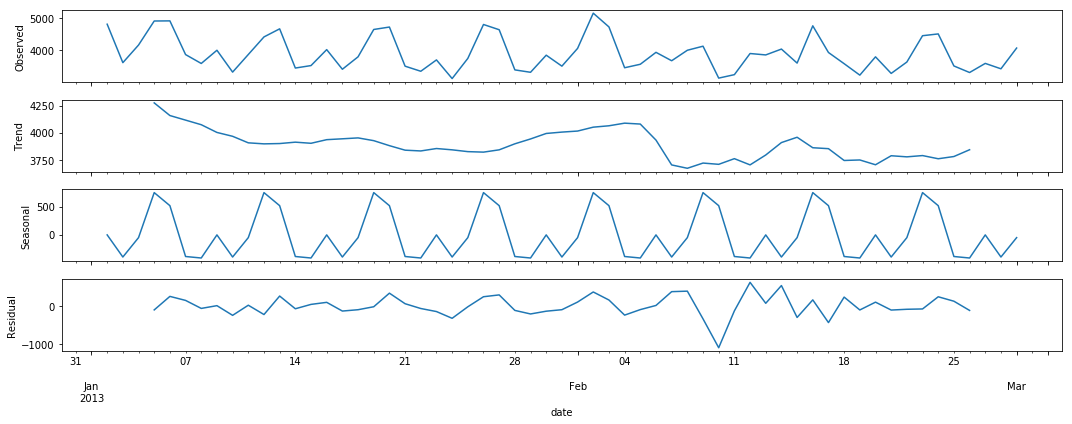

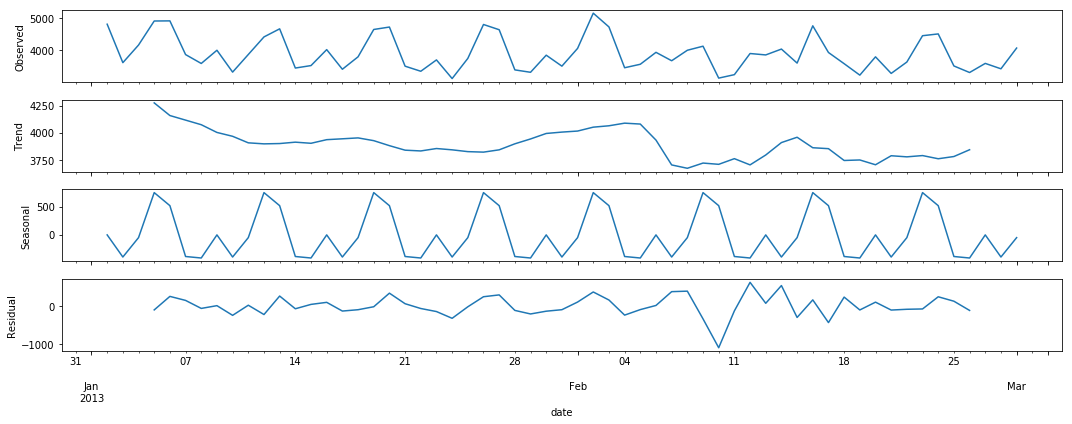

In [42]:
decomposition.plot()